# Project Overview

In today's digital era, online transactions and digital payments have become essential, but they also bring challenges like the rise in cybercrimes, including credit card fraud. One key issue in detecting fraud is imbalanced data, where legitimate transactions vastly outnumber fraudulent ones. This makes it harder to obtain fraud-related data, causing machine learning algorithms to often miss the minority class (fraudulent transactions), resulting in biased models.

With the increase in digital payments, fraud and cybercrimes are rising, highlighting the ongoing problem in both Card-Present and Card-Not-Present transactions. Detecting fraud remains a significant challenge in today's complex digital world, where trillions of transactions happen daily. The data used in this study is from an unnamed institution.

About the Dataset

Digital payments continue to evolve, but this is also accompanied by the evolution of cybercriminals.

According to the Data Breach Index, over 5 million records are stolen every day, a concerning statistic that shows fraud is still very common, both for Card-Present and Card-Not-Present payment types.

In today’s digital world, where trillions of card transactions occur daily, fraud detection becomes a major challenge.

This dataset is sourced from an unnamed institution.

Feature Explanation:

* distance_from_home – The distance from home to the transaction location.
* distance_from_last_transaction – The distance from the location of the last * * transaction.
* ratio_to_median_purchase_price – The ratio of the transaction purchase price to the median purchase price.
* repeat_retailer – Whether the transaction is made with the same retailer.
* used_chip – Whether the transaction was made using a chip (credit card).
* used_pin_number – Whether the transaction was made using a PIN number.
* online_order – Whether the transaction was an online order.
* fraud – Whether the transaction was fraudulent.

## Import Dataset & Function

In [ ]:
pip install pycaret

In [ ]:
import pandas as pd

In [ ]:
# C:\Users\USER\.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syahmisajid12","key":"a76cee502ebc4268b9b384c1c587dfe1"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d dhanushnarayananr/credit-card-fraud

Dataset URL: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud
License(s): CC0-1.0
 90% 26.0M/28.9M [00:02<00:00, 17.5MB/s]
100% 28.9M/28.9M [00:02<00:00, 12.2MB/s]


In [ ]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir, view_random_images,pred_and_plot, load_and_prep_image

--2025-01-13 15:28:39--  https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11485 (11K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.22K  --.-KB/s    in 0s      

2025-01-13 15:28:40 (94.6 MB/s) - ‘helper_functions.py’ saved [11485/11485]



## EDA

In [ ]:
unzip_data("/content/credit-card-fraud.zip")

In [ ]:
df = pd.read_csv("/content/card_transdata.csv")[:1500]
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.shape[0]

1500

In [ ]:
# Menyimpan DataFrame ke file CSV
df.to_csv("credit_card_fraud_1000.csv", index=False)

print("DataFrame telah disimpan ke 'credit_card_fraud_1000.csv'")

DataFrame telah disimpan ke 'credit_card_fraud_1000.csv'


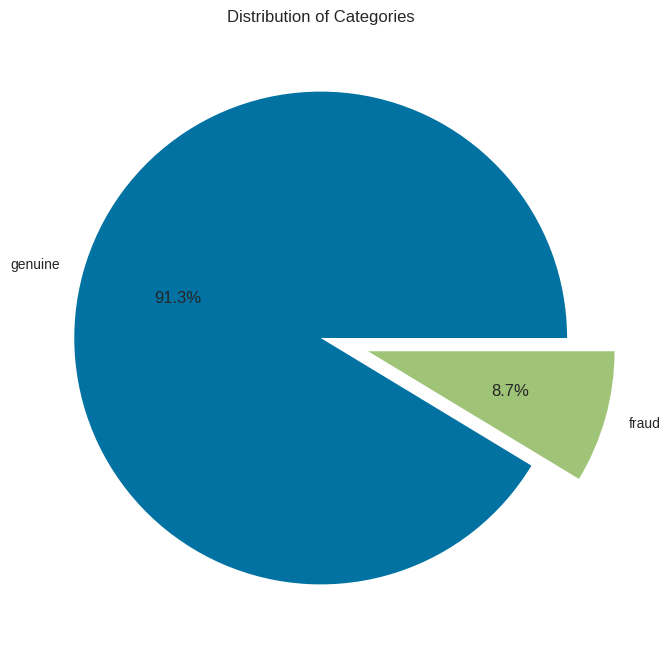

In [ ]:
import matplotlib.pyplot as plt

# Menghitung frekuensi nilai unik
category_counts = df['fraud'].value_counts()

label_fraud = ["no fraud", "fraud"]
# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(x=category_counts, labels=['genuine','fraud'], explode=[0.0, 0.2], autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()

## Modelling without Pre-processing

In [ ]:
from pycaret.classification import *

# Inisialisasi setup
# Default
# setup(data=df,
#       target='fraud',                  # Nama kolom target yang akan diprediksi
#       train_size=0.7,                  # 70% data untuk pelatihan
#       test_data=None,                  # Tidak ada data pengujian terpisah
#       normalize=False,                 # Tidak melakukan normalisasi
#       normalize_method='minmax',       # Metode normalisasi Min-Max (default)
#       transformation=False,            # Tidak ada transformasi fitur
#       transformation_method='yeo-johnson', # Metode transformasi Yeo-Johnson (akan diabaikan karena transformation=False)
#       handle_unknown_categorical='error', # Menangani kategori tidak dikenal dengan error
#       pca=False,                       # Tidak menggunakan PCA untuk reduksi dimensi
#       ignore_features=None,            # Tidak mengabaikan fitur apapun
#       categorical_features=None,       # Fitur kategorikal otomatis terdeteksi
#       numeric_features=None,           # Fitur numerik otomatis terdeteksi
#       date_features=None,              # Tidak ada fitur tanggal
#       text_features=None,              # Tidak ada fitur teks
#       session_id=None,                 # ID sesi acak (default None)
#       fold_shuffle=True,               # Data akan diacak saat pembagian fold
#       fold=10,                         # Menggunakan 10-fold cross-validation
#       log_experiment=False,            # Tidak ada pencatatan eksperimen otomatis
#       experiment_name='pycaret_classification', # Nama eksperimen
#       log_plots=False,                 # Tidak ada pencatatan plot evaluasi otomatis
#       use_gpu=False)                   # Tidak menggunakan GPU

# Setup dengan pengaturan umum yang sering diubah
setup(data=df,
      target='fraud',                   # Nama kolom target yang akan diprediksi
      train_size=0.8,                   # Menetapkan ukuran pelatihan (80% data untuk pelatihan)
      preprocess=False,                 # Tidak melakukan pre-processing secara default
      session_id=42)                    # Menetapkan ID sesi untuk reprodusibilitas

,Description,Value
0,Session id,42
1,Target,fraud
2,Target type,Binary
3,Original data shape,"(1500, 8)"
4,Transformed data shape,"(1500, 8)"
5,Transformed train set shape,"(1200, 8)"
6,Transformed test set shape,"(300, 8)"
7,Numeric features,7


In [ ]:
import matplotlib.pyplot as plt

# Membandingkan performa model
best_model = compare_models(include=['dt', 'rf', 'lr', 'knn', 'svm'])

# Mendapatkan tabel performa model
model_results = pull()

# Styling tabel hasil perbandingan
# styled_df = model_results.style.highlight_max(props="background-color:#004d40; color:white;")\
#                           .highlight_min(props="background-color:#862d4b; color:white;")

styled_df = model_results.style.highlight_max(props="background-color:#004d40; color:white;")

# Menampilkan styled_df di Jupyter Notebook
styled_df

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9958,0.9993,0.9618,0.9909,0.9756,0.9733,0.9738,0.2960
dt,Decision Tree Classifier,0.9942,0.9795,0.9618,0.9727,0.9661,0.9629,0.9636,0.0410
lr,Logistic Regression,0.9458,0.9736,0.4618,0.8481,0.5902,0.5646,0.5981,0.0460
knn,K Neighbors Classifier,0.9258,0.9395,0.4545,0.6016,0.5086,0.4704,0.4801,0.0370
svm,SVM - Linear Kernel,0.9000,0.8207,0.4491,0.5621,0.4256,0.3777,0.4113,0.0230


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.995800,0.999300,0.961800,0.990900,0.975600,0.973300,0.973800,0.296000
dt,Decision Tree Classifier,0.994200,0.979500,0.961800,0.972700,0.966100,0.962900,0.963600,0.041000
lr,Logistic Regression,0.945800,0.973600,0.461800,0.848100,0.590200,0.564600,0.598100,0.046000
knn,K Neighbors Classifier,0.925800,0.939500,0.454500,0.601600,0.508600,0.470400,0.480100,0.037000
svm,SVM - Linear Kernel,0.900000,0.820700,0.449100,0.562100,0.425600,0.377700,0.411300,0.023000


In [ ]:
model = create_model(
    'dt',           # Menentukan jenis model Decision Tree
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9917,0.9500,0.9000,1.0000,0.9474,0.9429,0.9444
2,0.9917,0.9500,0.9000,1.0000,0.9474,0.9429,0.9444
3,0.9917,0.9955,1.0000,0.9091,0.9524,0.9478,0.9491
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9917,0.9955,1.0000,0.9091,0.9524,0.9478,0.9491
6,0.9833,0.9500,0.9091,0.9091,0.9091,0.8999,0.8999
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9917,0.9545,0.9091,1.0000,0.9524,0.9478,0.9491


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# # Tuning model
# tuned_model = tune_model(model)

# # Membuat ensemble
# ensemble_model = ensemble_model(tuned_model)

In [ ]:
# Evaluasi model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Prediksi dengan model
predictions = predict_model(model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9987,0.9923,0.9846,1.0000,0.9922,0.9915,0.9916


In [ ]:
# Menyimpan model
save_model(model, 'model_name')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('placeholder', None),
                 ('trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', max_depth=None,
                                         max_features=None, max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_samples_leaf=1, min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         monotonic_cst=None, random_state=42,
                                         splitter='best'))],
          verbose=False),
 'model_name.pkl')

In [ ]:
# # Memuat model yang disimpan
# loaded_model = load_model('model_name')

# # Melakukan prediksi dengan model yang dimuat
# predictions = predict_model(loaded_model, data=df)

## Modelling With SMOTE

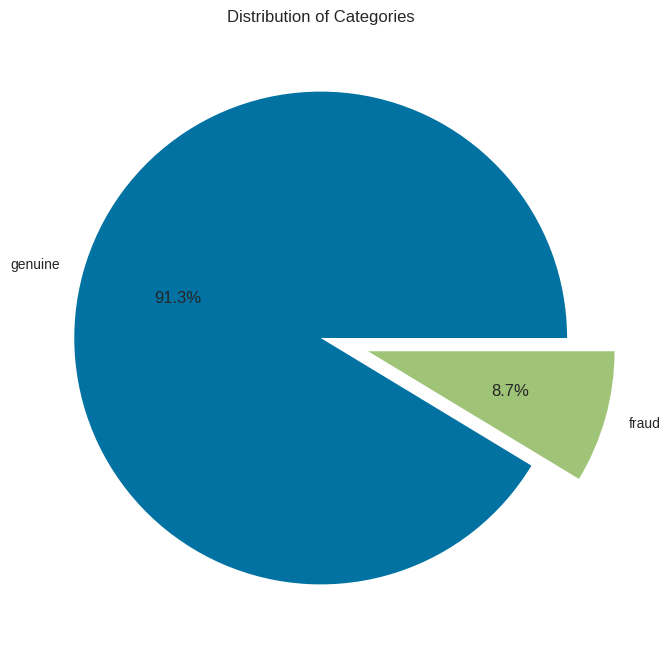

In [ ]:
import matplotlib.pyplot as plt

# Menghitung frekuensi nilai unik
category_counts = df['fraud'].value_counts()

label_fraud = ["no fraud", "fraud"]
# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(x=category_counts, labels=['genuine','fraud'], explode=[0.0, 0.2], autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()

In [ ]:
from pycaret.classification import *

# Setup dengan pengaturan umum yang sering diubah
setup(data=df,
      target='fraud',                   # Nama kolom target yang akan diprediksi
      train_size=0.8,                   # Menetapkan ukuran pelatihan (80% data untuk pelatihan)
      fix_imbalance=True,               # Mengaktifkan SMOTE
      session_id=42)                    # Menetapkan ID sesi untuk reprodusibilitas

,Description,Value
0,Session id,42
1,Target,fraud
2,Target type,Binary
3,Original data shape,"(1500, 8)"
4,Transformed data shape,"(2492, 8)"
5,Transformed train set shape,"(2192, 8)"
6,Transformed test set shape,"(300, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [ ]:
import matplotlib.pyplot as plt

# Membandingkan performa model
best_model = compare_models(include=['dt', 'rf', 'lr', 'knn', 'svm'])

# Mendapatkan tabel performa model
model_results = pull()

# Styling tabel hasil perbandingan
# styled_df = model_results.style.highlight_max(props="background-color:#004d40; color:white;")\
#                           .highlight_min(props="background-color:#862d4b; color:white;")

styled_df = model_results.style.highlight_max(props="background-color:#004d40; color:white;")

# Menampilkan styled_df di Jupyter Notebook
styled_df

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9975,0.9995,0.9909,0.9833,0.9865,0.9852,0.9855,0.3050
dt,Decision Tree Classifier,0.9942,0.9841,0.9718,0.9627,0.9671,0.9639,0.9640,0.0400
lr,Logistic Regression,0.9425,0.9773,0.9527,0.6199,0.7474,0.7171,0.7403,0.0940
knn,K Neighbors Classifier,0.9200,0.9459,0.9036,0.5247,0.6624,0.6208,0.6513,0.0870
svm,SVM - Linear Kernel,0.9192,0.9175,0.7982,0.5458,0.6314,0.5897,0.6134,0.0720


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.997500,0.999500,0.990900,0.983300,0.986500,0.985200,0.985500,0.305000
dt,Decision Tree Classifier,0.994200,0.984100,0.971800,0.962700,0.967100,0.963900,0.964000,0.040000
lr,Logistic Regression,0.942500,0.977300,0.952700,0.619900,0.747400,0.717100,0.740300,0.094000
knn,K Neighbors Classifier,0.920000,0.945900,0.903600,0.524700,0.662400,0.620800,0.651300,0.087000
svm,SVM - Linear Kernel,0.919200,0.917500,0.798200,0.545800,0.631400,0.589700,0.613400,0.072000


## Modelling With SMOTE & Drop Kolom

<Axes: >

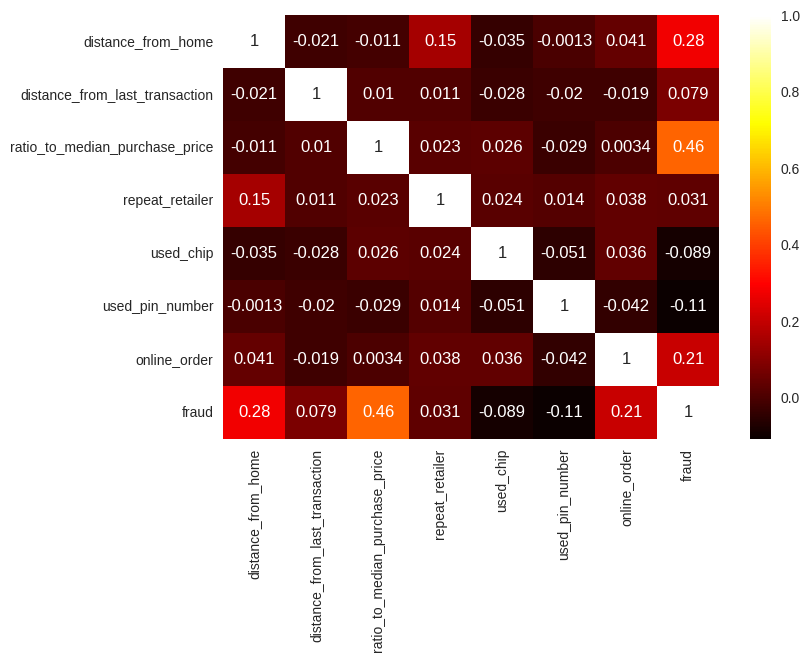

In [ ]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = "hot")

In [ ]:
# Menghapus satu kolom
df = df.drop('repeat_retailer', axis=1)

In [ ]:
from pycaret.classification import *

# Setup dengan pengaturan umum yang sering diubah
setup(data=df,
      target='fraud',                   # Nama kolom target yang akan diprediksi
      train_size=0.8,                   # Menetapkan ukuran pelatihan (80% data untuk pelatihan)
      fix_imbalance=True,               # Mengaktifkan SMOTE
      session_id=42)                    # Menetapkan ID sesi untuk reprodusibilitas

,Description,Value
0,Session id,42
1,Target,fraud
2,Target type,Binary
3,Original data shape,"(1500, 7)"
4,Transformed data shape,"(2492, 7)"
5,Transformed train set shape,"(2192, 7)"
6,Transformed test set shape,"(300, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [ ]:
import matplotlib.pyplot as plt

# Membandingkan performa model
best_model = compare_models(include=['dt', 'rf', 'lr', 'knn', 'svm'])

# Mendapatkan tabel performa model
model_results = pull()

# Styling tabel hasil perbandingan
# styled_df = model_results.style.highlight_max(props="background-color:#004d40; color:white;")\
#                           .highlight_min(props="background-color:#862d4b; color:white;")

styled_df = model_results.style.highlight_max(props="background-color:#004d40; color:white;")

# Menampilkan styled_df di Jupyter Notebook
styled_df

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9992,0.9990,0.9909,1.0000,0.9952,0.9948,0.9949,0.4680
dt,Decision Tree Classifier,0.9942,0.9841,0.9718,0.9636,0.9670,0.9638,0.9642,0.4620
lr,Logistic Regression,0.9442,0.9768,0.9527,0.6262,0.7524,0.7229,0.7450,0.1100
knn,K Neighbors Classifier,0.9200,0.9458,0.9036,0.5239,0.6618,0.6202,0.6508,0.0910
svm,SVM - Linear Kernel,0.9058,0.9257,0.8200,0.4917,0.6010,0.5534,0.5850,0.0710


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.999200,0.999000,0.990900,1.000000,0.995200,0.994800,0.994900,0.468000
dt,Decision Tree Classifier,0.994200,0.984100,0.971800,0.963600,0.967000,0.963800,0.964200,0.462000
lr,Logistic Regression,0.944200,0.976800,0.952700,0.626200,0.752400,0.722900,0.745000,0.110000
knn,K Neighbors Classifier,0.920000,0.945800,0.903600,0.523900,0.661800,0.620200,0.650800,0.091000
svm,SVM - Linear Kernel,0.905800,0.925700,0.820000,0.491700,0.601000,0.553400,0.585000,0.071000


In [ ]:
model = create_model(
    'dt',           # Menentukan jenis model Decision Tree
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9917,0.9955,1.0000,0.9091,0.9524,0.9478,0.9491
2,0.9917,0.9500,0.9000,1.0000,0.9474,0.9429,0.9444
3,0.9917,0.9955,1.0000,0.9091,0.9524,0.9478,0.9491
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9833,0.9500,0.9091,0.9091,0.9091,0.8999,0.8999
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9833,0.9500,0.9091,0.9091,0.9091,0.8999,0.8999


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Menyimpan model
save_model(model, 'Credit_card_smote')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['distance_from_home',
                                              'distance_from_last_transaction',
                                              'ratio_to_median_purchase_price',
                                              'used_chip', 'used_pin_number',
                                              'online_order'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_valu...
                                     transformer=FixImbalancer(estimator=SMOTE(k_neighbors=5,


In [ ]:
# Memuat model yang disimpan
loaded_model = load_model('Credit_card_smote')

# Melakukan prediksi dengan model yang dimuat
# predictions = predict_model(loaded_model, data=df)

Transformation Pipeline and Model Successfully Loaded


In [ ]:
df.sample(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order,fraud
739,3.519420,0.751523,1.086996,0.0,0.0,1.0,0.0
296,3.427954,0.075586,0.683655,0.0,0.0,1.0,0.0
863,0.641434,37.524812,0.348158,0.0,0.0,1.0,0.0
254,6.649470,0.801349,1.467928,0.0,0.0,0.0,0.0
966,27.378470,0.065477,0.391268,0.0,0.0,0.0,0.0
1480,15.929053,1.743846,0.746587,1.0,0.0,1.0,0.0
1144,34.123989,5.094910,4.959918,1.0,0.0,1.0,1.0
626,19.174675,0.171780,1.620704,0.0,0.0,0.0,0.0
853,47.920259,0.067295,1.625130,0.0,0.0,1.0,0.0
1473,205.303072,0.001604,1.563778,0.0,0.0,1.0,1.0


In [ ]:
df_test = pd.read_csv("/content/card_transdata.csv")[-100:]
df_test.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999900,11.323221,0.010367,0.524920,1.0,1.0,0.0,1.0,0.0
999901,3.485084,0.337119,0.681043,1.0,0.0,0.0,1.0,0.0
999902,70.272698,0.307762,14.038341,1.0,0.0,0.0,1.0,1.0
999903,241.832872,2.390563,1.079446,1.0,1.0,0.0,1.0,0.0
999904,7.840190,5.831672,0.079498,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Data input dalam bentuk list
data = [34.123989, 5.094910, 4.959918, 1.0	, 0.0, 1.0, 1.0]

# Mengonversi data ke dalam bentuk DataFrame
# Pastikan bahwa jumlah kolom sama dengan jumlah fitur yang diterima model
data_df = pd.DataFrame([data], columns=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'used_chip', 'used_pin_number', 'online_order', 'fraud'])

predictions = predict_model(loaded_model, data=df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
df_test.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999900,11.323221,0.010367,0.524920,1.0,1.0,0.0,1.0,0.0
999901,3.485084,0.337119,0.681043,1.0,0.0,0.0,1.0,0.0
999902,70.272698,0.307762,14.038341,1.0,0.0,0.0,1.0,1.0
999903,241.832872,2.390563,1.079446,1.0,1.0,0.0,1.0,0.0
999904,7.840190,5.831672,0.079498,1.0,0.0,0.0,1.0,0.0


In [ ]:
predictions.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,prediction_label,prediction_score
999900,11.323220,0.010367,0.524920,1.0,1.0,0.0,1.0,0.0,0,1.0
999901,3.485084,0.337119,0.681043,1.0,0.0,0.0,1.0,0.0,0,1.0
999902,70.272697,0.307762,14.038341,1.0,0.0,0.0,1.0,1.0,1,1.0
999903,241.832870,2.390563,1.079446,1.0,1.0,0.0,1.0,0.0,0,1.0
999904,7.840190,5.831672,0.079498,1.0,0.0,0.0,1.0,0.0,0,1.0
